In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sympy import *

### SymPy Definitions

In [48]:
x, y = symbols('x y')

# rosenbrock 2D
rosenbrock_2d = (1-x)**2 + 100*(y-x**2)**2

# himmelblau
himmelblau = (x**2+y-11)**2 + (x+y**2-7)**2

In [40]:
def sympy_grad(func):
    return lambdify((x,y),derive_by_array(func,(x,y)))

In [41]:
def sympy_hess(func):
    return lambdify((x,y),hessian(func,(x,y)))

# Defining functions to be optimized

### Himmelblau Function

In [5]:
# The Himmelblau Function
def Himmelblau(x0:float,x1:float)->float:
    return (x0**2+x1-11)**2 + ((x0+x1**2-7)**2)

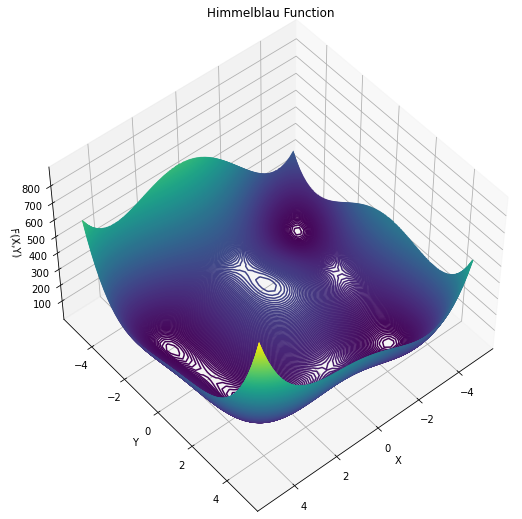

In [8]:
# https://www.indusmic.com/post/himmelblau-function
X=np.linspace(-5,5)
Y=np.linspace(-5,5)
x,y=np.meshgrid(X,Y)
F=Himmelblau(x,y)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,F,450)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(X,Y)')
ax.set_title('Himmelblau Function')
ax.view_init(50,50)

plt.show()

### Rosenbrock Function (2-D and N-D)

In [10]:
# The 2D Rosenbrock function
def Rosenbrock2D(x0:float,x1:float,b:int=10)->float:
    return ((x0-1)**2 + b*(x1-x0**2)**2)

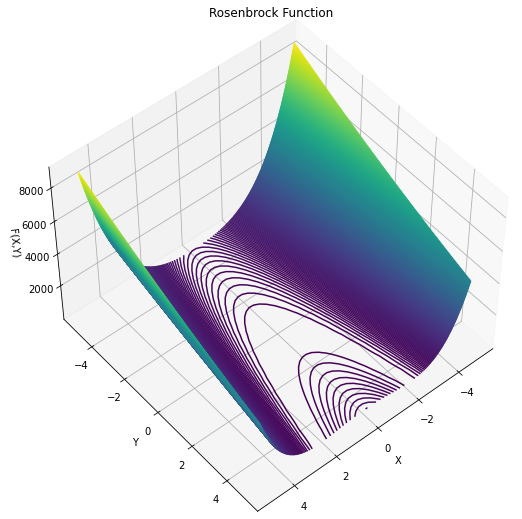

In [12]:
X=np.linspace(-5,5)
Y=np.linspace(-5,5)
x,y=np.meshgrid(X,Y)
F=Rosenbrock2D(x,y)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,F,450)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(X,Y)')
ax.set_title('Rosenbrock Function')
ax.view_init(50,50)

plt.show()

In [1]:
# The N-dimensional Rosebrock function
def RosenbrockND(X:list,b:int=10)->float:
    assert N%2==0, "Invalid N"
    N=len(X)
    s=0
    for i in range(1,N//2):
        s+=Rosenbrock2D(X[2*i-1],X[2*i],b)
    return s

In [1]:
# furthermore, we can define the 2D functions as lambdas
f_himm=lambda x,y: ((x**2+y-11)**2) + (((x+y**2-7)**2))
f_rosen=lambda x,y: (x-1)**2 + 100*(y-x**2)**2

# The (4) Optimization Methods

- Newton's method
    * no line search, no damping
    * with damping, no line search
    * line search only
- Gradient Descent

## Hyperparameters

- Newton's method
1. Tolerance $\epsilon$
2. Maximum iterations $i$
3. Damping factor $\gamma$
- Gradient Descent
4. Learning rate $\alpha$
5. Momentum $\beta$
6. Convergence rate $\tau$

### I. Newton's Method: No Line Search, No Damping

- Iteratively solve while defining a tolerance $\epsilon$ : 

$x_{k+1}=x_{k}-\frac{f'(x_{k})}{f''(x_{k})}$

- However, for the 2D case, the iterative method will be defined as:
[https://math.stackexchange.com/q/457915]

$x_{k+1}=x_{k}-\frac{\nabla f(x_k)}{\mathbf{H_f}}$

- Solution converges for:

$ |x_{k+1}-x_{k}|<\epsilon$

- Where $\epsilon$ (hyperparameter) is defined as a constant with magnitude $10^{-6}$.
- There is another convergence condition defined as $\text{max_iter}$ which does not allow the iterations to exceed a certain threshold.

In [5]:
# Newton's method for optimization implemented with no line search nor damping
# Need to find hessian and gradient using sympy
def Newton_1(func,xk,max_iter:int=10e3,epsilon:float=10e-6):
    _x=xk
    xk_1=0
    for _ in range(max_iter):
        xk_1=_x-Gradient(func(_x))/Hessian(func(_x))
        
        if (xk_1 - _x) < epsilon:
            return _x
        
        
    return _x

### II. Newton's Method: With Damping $\gamma$, No Line Search

- The only modification to the original Newton Method includes multiplying the second term in the iterative algorithm by a factor, this factor is considered a hyperparameter:

$x_{k+1}=x_{k}-\gamma [\frac{\nabla f(x_k)}{\mathbf{H_f}}],0<\gamma<1 $



In [1]:
# Newton's method with damping
# Use Newton 1 function with non-trivial gamma value
def Newton_2(func,xk,gamma:float=1.0,max_iter:int=10e3,epsilon:float=10e-6):
    assert gamma < 1, "Use Newton_1 instead"
    _x = Newton_1(func,xk,gamma,max_iter,epsilon)
    return _x

### III. Newton's Method: Line Search Only

In [ ]:
###### Backtracking linear search
def lineSearch(func, x):
    #initialize guess: alpha>0
    alpha = 1.0
    
    #set search direction p
    p = -Gradient(func(x))
    
    # c defined as c->(0,1)
    c = .65
    
    #initialize roh -> (0,1)
    roh = .85
    
    while (func(x + alpha * p) > func(x) + c * alpha * grad * p):
        alpha = roh * alpha
    return alpha

In [ ]:
# Newton's method: Line Search
# Implement using a backtracking line search
# use the alpha value found as gamma in the Newton Method
def Newton_3(func,xk,max_iter:int=10e3,epsilon:float=10e-6):
    alpha = lineSearch(func,xk)
    _x = Newton_2(func,xk,alpha,max_iter:int=10e3,epsilon:float=10e-6)
    return _x

### IV. Gradient Descent

In [3]:
# full-batch gradient descent (sgd may be implemented as well)
def gd():
    pass